<center>

# ICE STORE - GAMES FOR EVERYONE # 

# Planejamento da campanha publicitária de 2017 #

**<center>Neste projeto analisaremos dados históricos sobre video-games com o objetivo de planejarmos a campanha publicitária para o próximo ano.**

In [319]:
#importando as bibliotecas necessárias para o desenvolvimento do trabalho
import pandas as pd
import numpy as np
import seaborn as sns
import math as mt
from matplotlib import pyplot as plt
from scipy import stats as st
import requests

In [320]:
#lendo o arquivo e imprimindo 5 linhas do DataFrame para visualização do padrão
df_games = pd.read_csv('./datasets/games.csv')
print(df_games.sample(5))

                                            Name Platform  Year_of_Release  \
7285                               Pass the Pigs       DS           2008.0   
9976           Sengoku Cyber: Fujimaru Jigokuhen       PS           1995.0   
1292                             Disney Princess      GBA           2003.0   
4860   Fantastic Four: Rise of the Silver Surfer      PS2           2007.0   
14287                    Junior Island Adventure       DS           2011.0   

          Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
7285       Misc      0.20      0.00      0.00         0.02           NaN   
9976   Strategy      0.00      0.00      0.11         0.01           NaN   
1292   Platform      1.04      0.37      0.00         0.06           NaN   
4860     Action      0.19      0.15      0.00         0.05          36.0   
14287    Puzzle      0.03      0.00      0.00         0.00           NaN   

      User_Score Rating  
7285         NaN    NaN  
9976         NaN    Na

In [321]:
# imprimindo informações básicas sobre o DataFrame (colunas, quantidade de linhas, tipo de dados, dados ausentes)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [322]:
# Analisando se o DataFrame apresenta linhas duplicadas
print(df_games.duplicated().sum())

0


In [323]:
# Analisando a quantidade de linhas com dados ausentes em cada coluna
print(df_games.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


## Pré-processamento das informações do DataFrame para tratamentos iniciais ##

O arquivo contém 11 colunas e 16.715 linhas. O DataFrame, a princípio, não apresenta linhas duplicadas.

* Os nomes das colunas necessitam ser ajustados para snake_case.


**Algumas colunas necessitam avaliação ou ajustes conforme descrito abaixo:**


* **Name**: contém 2 linhas com valores ausentes e contém letras maiúsculas;
* **Platform**: as siglas estão em letras maiúsculas. Também é interessante converter os dados para o tipo 'categorical';
* **Year_of_Release**: contém informações ausentes (269);
* **Genre**: contém 2 linhas com informações ausentes, possui letras maiúsculas e convém converter para o tipo 'categorical';
* **Critic_Score**: Apresenta muitas linhas com dados ausentes (8.578);
* **User_Score**: Apresenta muitos dados ausentes (6.701) e os dados são do tipo object, quando deveriam ser Float;
* **Rating**: Apresenta dados ausentes (6.766). Convém converter para o tipo 'categorical

###  Ajustando os nomes das colunas ###

In [324]:
new_col_names = [] #criando uma lista para anexar os nomes modificados

for old_name in df_games.columns: # usando ciclo for para renomear automaticamente todas as colunas
    name_stripped = old_name.strip() # retirando possíveis espaços no início e no final do nome
    name_lowered = name_stripped.lower() # passando todas as letras para minúscula
    new_col_names.append(name_lowered) # anexando os nomes transformados na lista new_col_names

df_games.columns = new_col_names # modificando os nomes das colunas do DF com o método .columns

print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Coluna 'names' ###

contém 2 linhas com valores ausentes e contém letras maiúsculas

In [325]:
# Imprimindo as linhas com valores ausentes para verificar as demais informações
print(df_games[df_games['name'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


**Sem o nome do jogo, toda informação torna-se inútil. Portanto, removeremos as 2 linhas com dados ausentes na coluna nome**

In [326]:
# utilizando método dropna() para remoção das linhas com o parâmetro subset para especificação da coluna 'name'
df_games = df_games.dropna(subset=['name']) 

print(df_games['name'].isna().sum()) # checando se as linhas foram removidas com sucesso

0


In [327]:
# transformando todas as letras em minúsculas com método lower()
df_games['name'] = df_games['name'].str.lower()

#imprimindo para checar a alteração
print(df_games['name'].sample(3)) 

16529            hoshigami: ruining blue earth remix
925                              star fox adventures
14434    the legend of heroes iii: song of the ocean
Name: name, dtype: object


### Coluna ' platform'

As siglas das plataformas estão em letras maiúsculas

In [328]:
# transformando todas as letras em minúsculas com método lower()
df_games['platform'] = df_games['platform'].str.lower()

In [329]:
# Checando possível duplicidade de nomes após transformar todas as letras em minúscula
print(df_games['platform'].sort_values().unique())

['2600' '3do' '3ds' 'dc' 'ds' 'gb' 'gba' 'gc' 'gen' 'gg' 'n64' 'nes' 'ng'
 'pc' 'pcfx' 'ps' 'ps2' 'ps3' 'ps4' 'psp' 'psv' 'sat' 'scd' 'snes' 'tg16'
 'wii' 'wiiu' 'ws' 'x360' 'xb' 'xone']


In [330]:
# Convertendo os dados para tipo categorical
df_games['platform'] = df_games['platform'].astype('category')

#checando letras minúsculas e tipo de dados
print(df_games['platform'].sample(1))

7174    psp
Name: platform, dtype: category
Categories (31, object): ['2600', '3do', '3ds', 'dc', ..., 'ws', 'x360', 'xb', 'xone']


### Coluna year_of_release ###

contém informações ausentes (269)

**As outras colunas contém informações relevantes, então não podemos eliminar as linhas que contém informações ausentes em relação ao ano de lançamento. Porém, como trata-se de ano de lançamento, não podemos preenchê-las com média ou mediana, pois teríamos dados errados sobre o jogo. Por este motivo, deixaremos os dados como ausentes (NaN).**

### Coluna genre ###

contém 2 linhas com informações ausentes, possui letras maiúsculas e convém converter para o tipo 'categorical'

In [331]:
# As 2 linhas com valores ausentes na coluna 'genre' foram eliminadas juntamente com as da coluna 'name'
print(df_games['genre'].isna().sum())

0


In [332]:
# Transformando todas as letras em minúsculas
df_games['genre'] = df_games['genre'].str.lower()

# imprimindo para checar possíveis duplicidades de gêneros
print(df_games['genre'].sort_values().unique())

['action' 'adventure' 'fighting' 'misc' 'platform' 'puzzle' 'racing'
 'role-playing' 'shooter' 'simulation' 'sports' 'strategy']


In [333]:
# Convertendo os dados para tipo categorical
df_games['genre'] = df_games['genre'].astype('category')

print(df_games['genre'].sample(1))

9507    action
Name: genre, dtype: category
Categories (12, object): ['action', 'adventure', 'fighting', 'misc', ..., 'shooter', 'simulation', 'sports', 'strategy']


### Coluna critic_score ###

Apresenta linhas com dados ausentes (8.578)

In [334]:
print(df_games[df_games['critic_score'].isna()].sample(3))

                                               name platform  year_of_release  \
8046   hatsune miku and future stars: project mirai      3ds           2012.0   
16182             rocksmith 2014 edition remastered     xone           2016.0   
3520                                rapala: we fish      wii           2009.0   

        genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
8046     misc      0.00      0.00      0.18         0.00           NaN   
16182    misc      0.01      0.00      0.00         0.00           NaN   
3520   sports      0.52      0.01      0.00         0.04           NaN   

      user_score rating  
8046         NaN    NaN  
16182        tbd      T  
3520         tbd      E  


**Temos muitas informações úteis nas linhas com dados ausentes da coluna 'critic_score'. Portanto, não podemos excluir as linhas e devemos tratá-las de outra forma.**

**Por tratar-se de dados referentes às notas de avaliações dadas pelos críticos, não seria correto preencher estas informações com média ou mediana e nem por qualquer valor que pudesse gerar uma informação falsa sobre o jogo em questão. Desta forma, não alteraremos os dados ausentes e os deixaremos como NaN.**

### Coluna user_score ### 

Apresenta dados ausentes (6.701) e os dados são do tipo object, quando deveriam ser Float;


In [335]:
print(df_games[df_games['user_score'].isna()].sample(3))

                                   name platform  year_of_release  \
10103                        funky barn      3ds           2012.0   
4334                            persona       ps           1995.0   
15444  daikaijuu battle: ultra coliseum      wii           2008.0   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
10103    simulation      0.07      0.03      0.00         0.01           NaN   
4334   role-playing      0.00      0.00      0.42         0.03           NaN   
15444      fighting      0.00      0.00      0.02         0.00           NaN   

      user_score rating  
10103        NaN    NaN  
4334         NaN    NaN  
15444        NaN    NaN  


**Novamente, temos muitas informações úteis nas linhas com dados ausentes da coluna 'user_score'. Portanto, não podemos excluir as linhas.**

**Por se tratarem de dados referente a notas de avaliações, não é possível preenchê-los com dados de média ou mediana, pois teríamos dados com informações equivocadas sobre os jogos. Desta forma, não alteraremos os dados ausentes e os deixaremos como NaN.**

**Ao tentar converter o tipo de dados para float, recebemos um Erro como resposta devido algumas linhas estarem preenchidas com valores de string. Desta forma, iremos verificar os valores univocos para entender melhor o que pode ser.**

In [336]:
print(df_games['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


**Encontramos a string 'tbd', que significa "to be defined" (a ser definido), ou seja, esses jogos de fato não tiveram uma nota de usuário atribuída. Portanto, este dado não tem significado nenhum para nós, porém, as demais informações referentes a estas linhas podem ser úteis. Desta forma, devemos tratá-los da mesma forma que fizemos com os valores ausentes.**

In [337]:
# Substituindo as strings por NaN com o método replace()
df_games['user_score'] = df_games['user_score'].replace('tbd', 'NaN')

# Checando se a string 'tbd' foi substituída
print(df_games['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'NaN' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [338]:
# Convertendo os dados para tipo float com o método astype()
df_games['user_score'] = df_games['user_score'].astype('float')

print(df_games['user_score'].sample(5))

2501     8.3
10266    8.8
11259    NaN
3199     8.4
9515     NaN
Name: user_score, dtype: float64


### Coluna rating ###

Apresenta valores ausentes. Convém converter para o tipo 'categorical.

In [339]:
# Verificando quantidade de valores ausentes
print(df_games['rating'].isna().sum())

6764


In [340]:
# Imprimindo amostras para checar demais linhas
print(df_games[df_games['rating'].isna()].sample(5))

                                                    name platform  \
4151   dragon quest 25 shuunen kinin: famicom & super...      wii   
12472                                     blast lacrosse       ps   
13506     mana khemia: alchemists of al-revis (jp sales)      ps2   
6203                                        thief (2014)     x360   
2139                                      dragon quest x      wii   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
4151            2011.0  role-playing      0.00      0.00      0.47   
12472           2001.0        sports      0.03      0.02      0.00   
13506           2007.0  role-playing      0.00      0.00      0.04   
6203            2014.0        action      0.14      0.11      0.00   
2139            2012.0  role-playing      0.00      0.00      0.96   

       other_sales  critic_score  user_score rating  
4151          0.00           NaN         NaN    NaN  
12472         0.00           NaN         NaN    NaN  
13

**Devido termos uma quantidade grande de valores ausentes e termos informações relevantes nas outras colunas, não podemos excluir as linhas com valores ausentes. Por se tratar de uma coluna categórica, iremos substituir por uma string 'unknown' (desconhecido) e formar uma nova categoria com essa string, assim ela pode ser filtrada posteriormente.**

In [341]:
# Preenchendo valores ausentes com a string 'unknown' utilizando método fillna()
df_games['rating'] = df_games['rating'].fillna('unknown')

# checando se valores ausentes foram preenchidos
print(df_games['rating'].isna().sum())

0


In [342]:
# Convertendo tipo de dados para categorical
df_games['rating'] = df_games['rating'].astype('category')

print(df_games['rating'].sample(1))

14252    T
Name: rating, dtype: category
Categories (9, object): ['AO', 'E', 'E10+', 'EC', ..., 'M', 'RP', 'T', 'unknown']


### Checando DataFrame após pré-processamento ###

In [343]:
print(df_games.sample(5))

                                        name platform  year_of_release  \
566    professor layton and the last specter       ds           2009.0   
7497                           lost planet 3      ps3           2013.0   
12984                        dynamite headdy      gen           1993.0   
7282                               full auto     x360           2006.0   
2240                    disney magical world      3ds           2013.0   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
566       puzzle      0.28      1.39      0.68         0.32          83.0   
7497     shooter      0.07      0.05      0.06         0.02          61.0   
12984   platform      0.00      0.00      0.05         0.00           NaN   
7282     shooter      0.19      0.01      0.00         0.02          70.0   
2240   adventure      0.17      0.20      0.53         0.03          71.0   

       user_score   rating  
566           8.7     E10+  
7497          5.5        T  
12984

In [344]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16713 non-null  category
 2   year_of_release  16444 non-null  float64 
 3   genre            16713 non-null  category
 4   na_sales         16713 non-null  float64 
 5   eu_sales         16713 non-null  float64 
 6   jp_sales         16713 non-null  float64 
 7   other_sales      16713 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           16713 non-null  category
dtypes: category(3), float64(7), object(1)
memory usage: 1.2+ MB


**Após pré-processamento, podemos observar acima que:**

* Os nomes das colunas estão todos em snake_case;
* Temos 16713 linhas, pois 2 foram eliminadas devido não ter informação do nome do jogo;
* Algumas colunas seguem com dados ausentes, porém já avaliamos os casos e não faz sentido preenchê-los;
* Todas as colunas encontram-se com os tipos de dados adequados.

### Enriquecimento dos dados ###

**Para futuras avaliações, é interessante enriquecer os dados. Iremos nesta etapa calcular o total de vendas, somando as vendas de todas as regiões para cada jogo e colocando esses valores em uma nova coluna**.

In [345]:
# Criando a coluna 'total_sales' com a soma das vendas de todas as regiões
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

print(df_games.sample(5))

                                            name platform  year_of_release  \
16130                winback 2: project poseidon      ps2           2006.0   
538                                battlefield 3       pc           2011.0   
14861  emily archer and the curse of tutankhamun       ds           2011.0   
7739                                 steins;gate      psp           2011.0   
4303               the new york times crosswords       ds           2007.0   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16130    shooter      0.01      0.01      0.00         0.00          48.0   
538      shooter      0.89      1.43      0.00         0.46          89.0   
14861  adventure      0.00      0.02      0.00         0.00           NaN   
7739   adventure      0.00      0.00      0.19         0.00           NaN   
4303      puzzle      0.42      0.00      0.00         0.03          79.0   

       user_score   rating  total_sales  
16130         NaN        T

## Análise dos dados ##

**Agora estamos com os dados "limpos" e vamos começar nossas análises.**

**Nesta fase iremos realizar as seguintes etapas:**

* Verificaremos quantos jogos foram lançados em anos diferentes e se os dados de cada período são significativos;  


* Como as vendas variaram de plataforma para plataforma. Construiremos uma distribuição para as plataformas com as maiores vendas totais com base em dados para cada ano, buscando encontrar padrões no comportamento do mercado. Encontraremos as plataformas que costumavam ser populares, mas agora não têm vendas e quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem;  


* Analisando as respostas das avaliações realizadas anteriormente, determinaremos para qual período devemos pegar dados para que possamos construir um modelo para o próximo ano (2017);  


* Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecionaremos plataformas potencialmente lucrativas;  


* Construiremos um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. Verificaremos se as diferenças nas vendas são significativas e as vendas médias em várias plataformas;  


* Verificaremos como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular. Construiremos um gráfico de dispersão e calcularemos a correlação entre revisões (de críticos e usuários) e vendas;  


* Após tirarmos algumas conclusões, compararemos as vendas dos mesmos jogos em outras plataformas;  


* Avaliaremos a distribuição geral de jogos por gênero e veremos o que podemos concluir sobre os gêneros mais lucrativos.  

### Quantos jogos foram lançados em anos diferentes: ###

In [346]:
# Filtrando o DataFrame para obter um novo DataFrame somente com os valores em que temos a data de lançamento do jogo
games_by_year_clean = df_games[~df_games['year_of_release'].isna()]

# Agrupando por data de lançamento e contando quantos jogos lançados por ano
games_by_year = games_by_year_clean.groupby('year_of_release')['name'].count()

print(games_by_year)

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64


**Vamos criar um gráfico de linhas para facilitar a visualização dos dados ao longo dos anos**

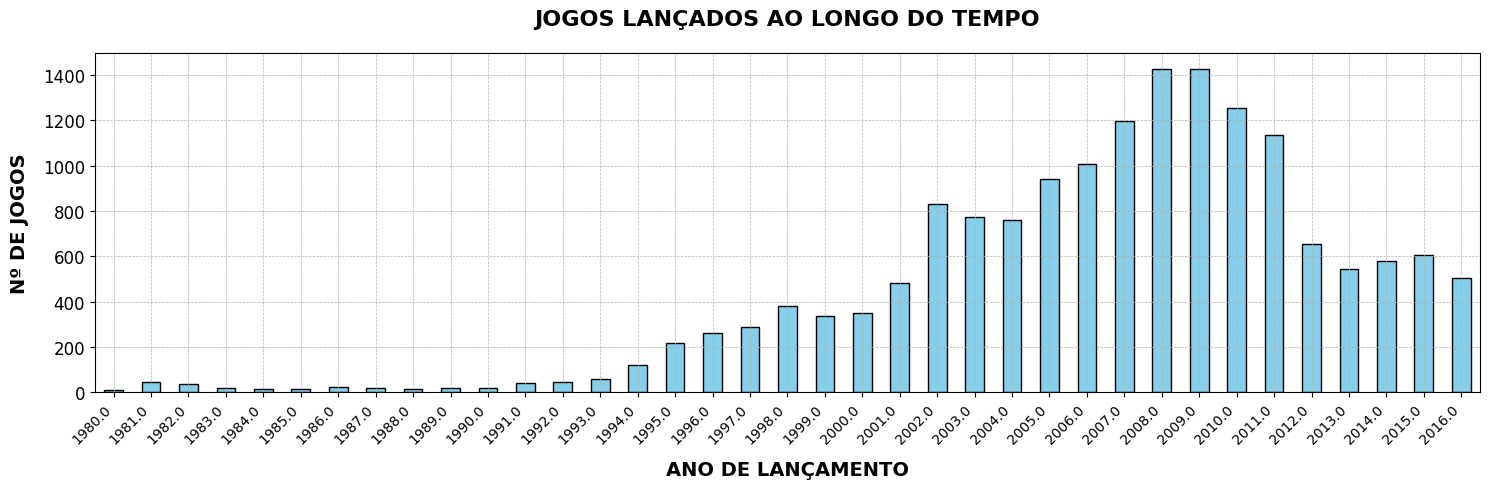

In [347]:
fig, ax = plt.subplots(figsize=[15, 5])

# Criando o gráfico
games_by_year.plot(kind='bar',
                   ax=ax,
                   color='skyblue',
                   edgecolor='black')

# Título e rótulos dos eixos
ax.set_title('JOGOS LANÇADOS AO LONGO DO TEMPO', fontsize=16, weight="bold", pad=20)
ax.set_xlabel('ANO DE LANÇAMENTO', fontsize=14, labelpad=10, weight="bold")
ax.set_ylabel('Nº DE JOGOS', fontsize=14, labelpad=10, weight="bold")

# Rotacionando os rótulos do eixo x
ax.set_xticklabels(games_by_year.index, rotation=45, ha='right')

# Ajustando o tamanho dos rótulos dos eixos
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=12)

# Adicionando gridlines
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Removendo a legenda
ax.legend().set_visible(False)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

**Podemos observar no gráfico que:**


* A década de 1980 teve uma estabilidade nos lançamentos de jogos, sendo esse número muito abaixo das décadas seguintes;


* Na década de 1990, observamos um aumento significativo do número de jogos lançados, principalemnte a partir de 1994;


* A partir de 2002 podemos observar um grande 'boom' de lançamentos, que durou até o ano de 2011;


* Em 2012 iniciou-se uma queda na quantidade de lançamentos de novos jogos e essa realidade tem se mantido estável até o ano de 2016, com pequenas variações.


### Como as vendas variaram de plataforma para plataforma ao longo dos anos: ###

Construiremos uma distribuição para as plataformas com as maiores vendas totais com base em dados para cada ano. 
Encontraremos as plataformas que costumavam ser populares, mas agora não têm vendas e quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem;

In [348]:
# Obtendo a soma das vendas totais de cada plataforma ao longo dos anos e ordenando da maior para menor
best_platforms = df_games.groupby('platform', observed=False)['total_sales'].sum().sort_values(ascending = False)
best_platforms = best_platforms.reset_index()

# Imprimindo as 5 plataformas com mais vendas totais
print(best_platforms.head(5))

  platform  total_sales
0      ps2      1255.77
1     x360       971.42
2      ps3       939.65
3      wii       907.51
4       ds       806.12


**As plataformas que somaram mais vendas ao longo dos anos foram: ps2, x360, ps3, wii e ds**

In [349]:
# Criando uma função que filtra por plataforma, depois agrupa por ano e retorna a soma das vendas totais
def platform_sales(df, platform):
    new_df = df[df['platform'] == platform]
    new_df = new_df.groupby('year_of_release')['total_sales'].sum()
    return new_df 

#Chamando a função para cada uma das plataformas do top 5 e definindo a coluna 'year_of_release' como índice
sales_ps2 = platform_sales(games_by_year_clean, 'ps2').reset_index().set_index('year_of_release')
sales_x360 = platform_sales(games_by_year_clean, 'x360').reset_index().set_index('year_of_release')
sales_ps3 = platform_sales(games_by_year_clean, 'ps3').reset_index().set_index('year_of_release')
sales_wii = platform_sales(games_by_year_clean, 'wii').reset_index().set_index('year_of_release')
sales_ds = platform_sales(games_by_year_clean, 'ds').reset_index().set_index('year_of_release')

# imprimindo uma plataforma como exemplo para checar o resultado
print(sales_ps2)

                 total_sales
year_of_release             
2000.0                 39.17
2001.0                166.43
2002.0                205.38
2003.0                184.31
2004.0                211.81
2005.0                160.66
2006.0                103.42
2007.0                 75.99
2008.0                 53.90
2009.0                 26.40
2010.0                  5.64
2011.0                  0.45


In [350]:
# Criando uma função que mescle (usando merge) 5 DataFrames ao mesmo tempo
def merge_5_dfs(df1, df2, df3, df4, df5):
    df_merged_1 = df1.merge(df2, on='year_of_release', how='outer', suffixes=('_ps2', '_x360'))
    df_merged_2 = df_merged_1.merge(df3, on='year_of_release', how='outer', suffixes=('', '_ps3'))
    df_merged_3 = df_merged_2.merge(df4, on='year_of_release', how='outer', suffixes=('', '_wii'))
    df_merged_4 = df_merged_3.merge(df5, on='year_of_release', how='outer', suffixes=('', '_ds'))

    return df_merged_4


# Chamando a função para mesclar os DataFrames das vendas das plataformas
df_top_5 = merge_5_dfs(sales_ps2, sales_x360, sales_ps3, sales_wii, sales_ds)

# Alterando os nomes das colunas no DataFrame mesclado
col_merged_names = ['sales_ps2', 'sales_x360', 'sales_ps3', 'sales_wii', 'sales_ds']
df_top_5.columns = [col_merged_names]

# Ordenando os índices para que os anos fiquem em ordem crescente
df_top_5 = df_top_5.sort_index()

print(df_top_5)


                sales_ps2 sales_x360 sales_ps3 sales_wii sales_ds
year_of_release                                                  
1985.0                NaN        NaN       NaN       NaN     0.02
2000.0              39.17        NaN       NaN       NaN      NaN
2001.0             166.43        NaN       NaN       NaN      NaN
2002.0             205.38        NaN       NaN       NaN      NaN
2003.0             184.31        NaN       NaN       NaN      NaN
2004.0             211.81        NaN       NaN       NaN    17.27
2005.0             160.66       8.25       NaN       NaN   130.14
2006.0             103.42      51.62     20.96    137.15   119.81
2007.0              75.99      95.41     73.19    152.77   146.94
2008.0              53.90     135.26    118.52    171.32   145.31
2009.0              26.40     120.29    130.93    206.97   119.54
2010.0               5.64     170.03    142.17    127.95    85.02
2011.0               0.45     143.84    156.78     59.65    26.18
2012.0    

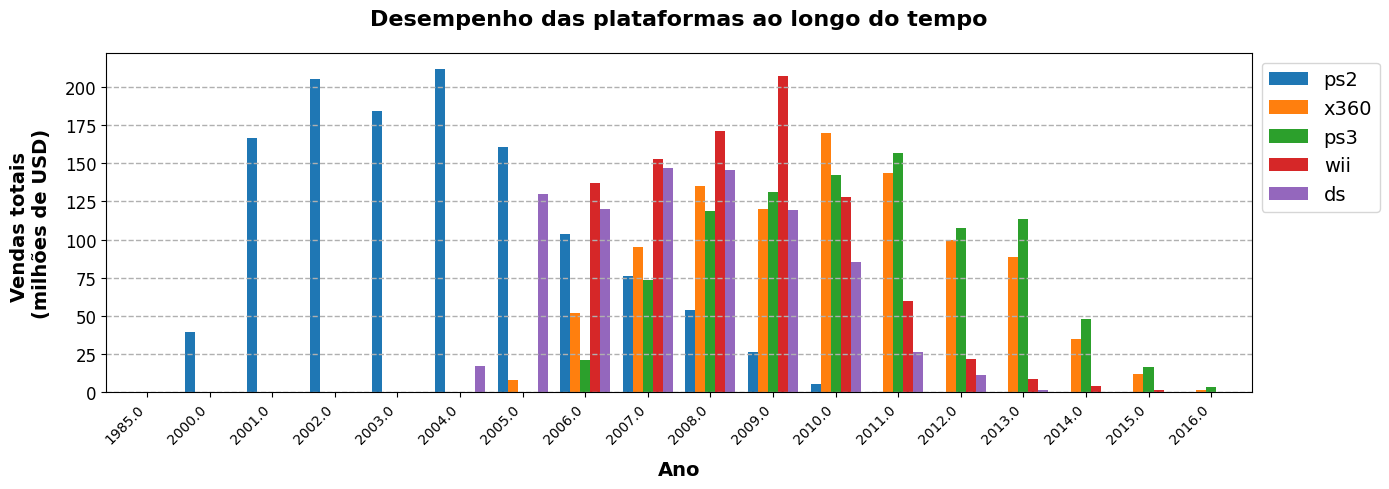

In [351]:
# Plotando um gráfico de barras para visualização dos dados de vendas das plataformas top-5 ao longo dos anos
ax = df_top_5.plot(kind='bar',
                   figsize=[14, 5],
                   width=0.8,
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Ajustando o título e os rótulos dos eixos
ax.set_title('Desempenho das plataformas ao longo do tempo', fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Ano', fontsize=14, labelpad=10, weight='bold')
ax.set_ylabel('Vendas totais \n(milhões de USD)', fontsize=14, labelpad=10, weight='bold')

# Rotacionando os rótulos do eixo x
ax.set_xticklabels(df_top_5.index, rotation=45, ha='right')

# Ajustando o tamanho dos rótulos dos eixos
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=12)

# Adicionando gridlines
ax.grid(True, which='both', linestyle='--', linewidth=1, axis='y')

# Posicionando a legenda fora do gráfico
plt.legend(['ps2', 'x360', 'ps3', 'wii', 'ds'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Ajustando layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

**Analisando o gráfico acima podemos observar que:**

* Lançado no ano 2000, o ps2 reinou no mercado até o ano de 2005 (ano de lançamento dos consoles nintendo wii e xbox 360) e, a  partir de 2006, (ano de lançamento do nintendo ds e ps3) começou a enfrentar o crescimento gigantesco de concorrentes. A partir daí, as vendas foram caindo ano a ano, vindo a desaparecer completamente no ano de 2011, **durou 11 anos no mercado**;  
  
  
*  O Nintendo wii começou a dominar o mercado assim que surgiu em 2006 e liderou até 2009. No ano de 2010 começou a ver suas vendas caírem drasticamente até desaparecer do mercado no ano de 2015, **durou 9 anos no mercado**;  
  
  
* O Nintendo ds surgiu em 2005 ocupando uma fatia ainda bem reduzida do mercado neste ano. Porém, em 2006 teve um garnde crescimento e brigou pela liderança com o wii até 2009, quando começou a ter suas vendas reduzidas, vindo a desaparecer completamente no ano de 2013, **durou 9 anos no mercado**;  


* O xbox 360 começou a aparecer no ano de 2005 e manteve seu crescimento até o ano de 2010. Depois perdeu força e foi tendo suas vendas reduzidas ano após ano, vindo a desaparecer no ano de 2016, **durou 11 anos no mercado**;  


* O ps3 lançado para substituir o ps2, suurgiu no mercado em 2006 e começou seu crescimento gradual, até o ano de 2011. A partir de 2012 teve uma redução das vendas e assim foi até praticamente desaparecer no ano de 2016, **durou 11 anos no mercado.**


**É possível observar que existe um padrão no mercado, sendo que as novas plataformas começam a aparecer no mercado já no ano de lançamento, tendo um crescimento muito grande a partir de segundo ano, o que perdura por cerca de 4 a 5 anos, quando começam a ter uma queda nas vendas até sumirem do mercado.**

### Projetando o mercado para o próximo ano: ###

**Utilizando as conclusões realizadas anteriormente, focaremos nos dados dos últimos 5 anos para que possamos construir um modelo para 2017;**

* Verificaremos quais plataformas estão liderando em vendas;
* Quais estão crescendo ou diminuindo suas vendas;
* Selecionaremos plataformas potencialmente lucrativas.

In [352]:
# Filtrando o DataFrame para obter dados a partir da data selecionada
df_games_recently = df_games[df_games['year_of_release'] > 2011]

year_min = df_games_recently['year_of_release'].min()
year_max = df_games_recently['year_of_release'].max()

print(f'Verificaremos os dados de {year_min} até {year_max}')

Verificaremos os dados de 2012.0 até 2016.0


In [353]:
# Verificando o total de vendas do mercado como um todo ao longo dos últimos anos
print(df_games_recently.groupby('year_of_release', observed=False)['total_sales'].sum())

year_of_release
2012.0    355.84
2013.0    361.24
2014.0    331.53
2015.0    267.98
2016.0    129.94
Name: total_sales, dtype: float64


**É possível observar que o mercado vem sofrendo com uma queda de vendas nos últimos anos, sendo que nos últimos 2 anos essa queda foi acentuada.**

In [354]:
# Agrupando os dados filtrados por ano e plataforma, e retornando o valor da soma das vendas
df_platforms_recently = df_games_recently.groupby(['year_of_release', 'platform'], observed=False)['total_sales'].sum()
df_platforms_recently = df_platforms_recently.reset_index()

# filtrando somente os dados em que as vendas não estão zeradas
useful_platforms_recently = df_platforms_recently[df_platforms_recently['total_sales'] > 0]
useful_platforms_recently = useful_platforms_recently.set_index('year_of_release')

print(useful_platforms_recently.sample(5))

                platform  total_sales
year_of_release                      
2014.0               psp         0.24
2015.0               ps4       118.90
2014.0              x360        34.74
2014.0              wiiu        22.03
2013.0                ds         1.54


In [355]:
# Criando uma lista com as plataformas que iremos avaliar
useful_platforms_list = useful_platforms_recently['platform'].sort_values().unique().tolist()

print(useful_platforms_list)

['3ds', 'ds', 'pc', 'ps3', 'ps4', 'psp', 'psv', 'wii', 'wiiu', 'x360', 'xone']


In [356]:
# Criando uma lista com as plataformas inúteis para nós para utilizar posteriormente
ununseful_platforms = df_games[~df_games['platform'].isin(useful_platforms_list)]
ununseful_platforms = ununseful_platforms['platform'].sort_values().unique().tolist()

print(ununseful_platforms)

['2600', '3do', 'dc', 'gb', 'gba', 'gc', 'gen', 'gg', 'n64', 'nes', 'ng', 'pcfx', 'ps', 'ps2', 'sat', 'scd', 'snes', 'tg16', 'ws', 'xb']


In [357]:
# criando uma tabela dinâmica com os dados filtrados a partir de 2012
pivot_games_recently = df_games_recently.pivot_table(index= 'year_of_release',
                                                     columns= 'platform',
                                                     values= 'total_sales',
                                                     aggfunc= 'sum',
                                                     observed=False
                                                    )

# Excluindo as colunas que contém dados sobre as plataformas inúteis para a análise
pivot_games_recently = pivot_games_recently.drop(ununseful_platforms, axis = 1)

print(pivot_games_recently)

platform           3ds     ds     pc     ps3     ps4   psp    psv    wii  \
year_of_release                                                            
2012.0           51.36  11.01  23.22  107.36    0.00  7.69  16.19  21.71   
2013.0           56.57   1.54  12.38  113.25   25.99  3.14  10.59   8.59   
2014.0           43.76   0.00  13.28   47.76  100.00  0.24  11.90   3.75   
2015.0           27.78   0.00   8.52   16.82  118.90  0.12   6.25   1.14   
2016.0           15.14   0.00   5.25    3.60   69.25  0.00   4.25   0.18   

platform          wiiu   x360   xone  
year_of_release                       
2012.0           17.56  99.74   0.00  
2013.0           21.65  88.58  18.96  
2014.0           22.03  34.74  54.07  
2015.0           16.35  11.96  60.14  
2016.0            4.60   1.52  26.15  


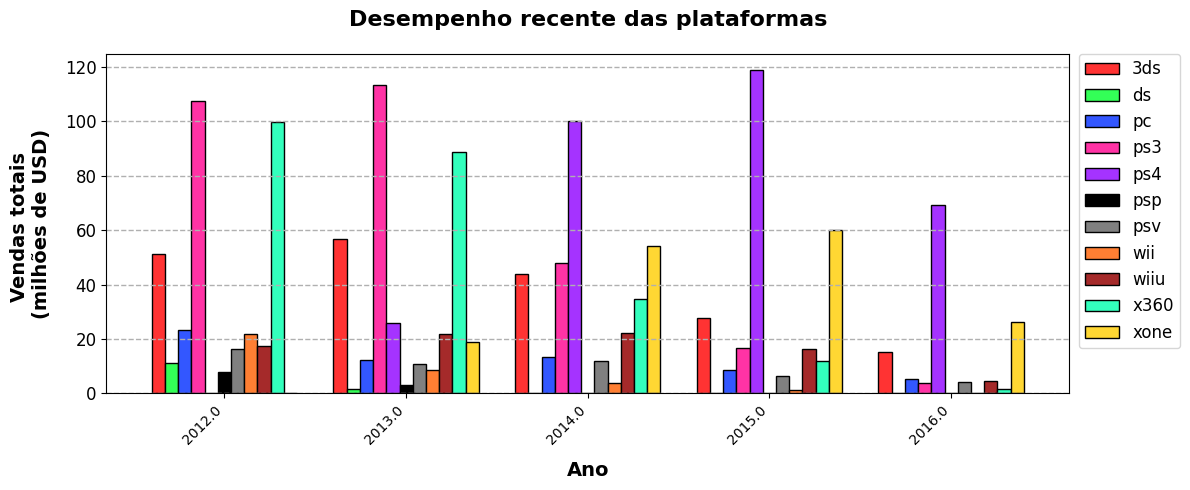

In [358]:
# Definindo as cores das 11 variáveis
colors = ['#FF3333', '#33FF57', '#3357FF', '#FF33A5', '#A533FF', '#000000', '#808080', '#FF7F33', '#A52A2A', '#33FFBD', '#FFD733']

# Criando um gráfico de barras para análise dos dados
ax = pivot_games_recently.plot(kind='bar',
                               figsize=[12, 5],
                               width=0.8,
                               color=colors,
                               edgecolor='black')

# Ajustando o título e os rótulos dos eixos
ax.set_title('Desempenho recente das plataformas', fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Ano', fontsize=14, labelpad=10, weight='bold')
ax.set_ylabel('Vendas totais \n(milhões de USD)', fontsize=14, labelpad=10, weight='bold')

# Rotacionando os rótulos do eixo x
ax.set_xticklabels(pivot_games_recently.index, rotation=45, ha='right')

# Ajustando o tamanho dos rótulos dos eixos
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=12)

# Adicionando gridlines
ax.grid(True, which='both', linestyle='--', linewidth=1, axis='y')

# Posicionando a legenda fora do gráfico
plt.legend(fontsize=12, bbox_to_anchor=(1.01, 1), loc="upper left", borderaxespad=0)

# Ajustando layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

**Analisando os dados de 2012 a 2016 podemos tirar as seguintes conclusões:**

* O mercado de games como um todo vem sofrendo com uma queda de vendas nos últimos anos, sendo que nos últimos 2 anos essa queda foi acentuada;


* As plataformas líderes do mercado nos últimos anos são: **PS4, Xone e 3DS**;


* As plataformas **PC , PSV e WiiU** nunca foram líderes do mercado, mas são mais estáveis. Elas vem tendo uma queda, porém, ainda devem ocupar uma pequena fatia do mercado no ano de 2017;


* As plataformas **PS3 e X360** vem tendo uma queda vertiginosa e tendem a desaparecer do mercado no próximo ano;


* As plataformas **DS, PSP, Wii** já desapareceram do mercado neste intervalo de tempo.


**Portanto, as plataformas que são potencialmente lucrativas são: PS4, Xone, 3DS, PC , PSV e WiiU.**

### Avaliando outros aspectos do mercado ###

**Nesta etapa iremos:** 

**1- Construir um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma para verificarmos:**

* Se as diferenças nas vendas são significativas;
* As vendas médias em várias plataformas.

**2- Avaliar como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular:**
* Construiremos um gráfico de dispersão e calcularemos a correlação entre revisões e vendas;
* Compararemos as vendas dos mesmos jogos em outras plataformas.

**3- Avaliar a distribuição geral de jogos por gênero:**
* Descobriremos quais são os gêneros mais lucrativos.


#### Vamos construir um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma ####

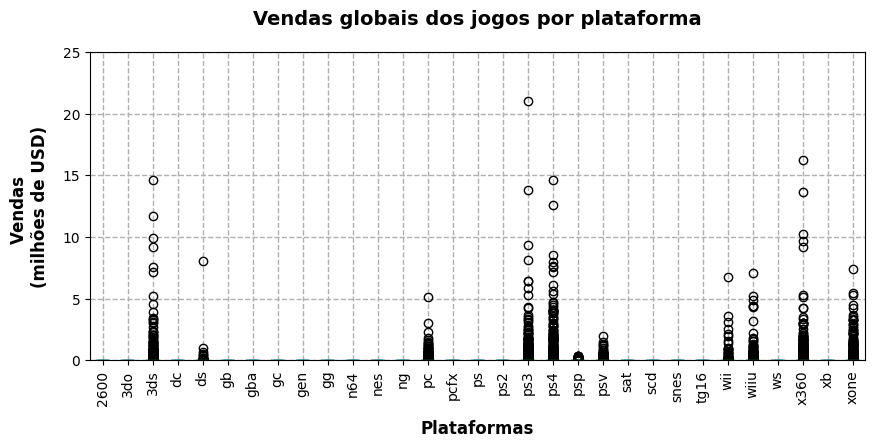

In [359]:
# Construindo um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma.
fig, ax = plt.subplots(figsize=(10, 4))

# Plotando o diagrama de caixa
platform_global_sales.plot(kind='box',
                           ax=ax)

# Ajustando o título e os rótulos dos eixos
ax.set_title('Vendas globais dos jogos por plataforma', fontsize=14, weight='bold', pad=20)
ax.set_xlabel('Plataformas', fontsize=12, labelpad=10, weight='bold')
ax.set_ylabel('Vendas \n(milhões de USD)', fontsize=12, labelpad=10, weight='bold')

# Adicionando gridlines
ax.grid(True, which='both', linestyle='--', linewidth=1)

# Ajustando a rotação dos rótulos do eixo X
plt.xticks(rotation=90)

# Ajustando os limites do eixo Y, se necessário
plt.ylim(0, 25)

plt.show()

In [360]:
print(f"Apenas {df_games_recently[df_games_recently['total_sales'] > 5]['name'].count()} jogos tiveram vendas acima de 5M USD")
print()
print(f"Apenas {df_games_recently[df_games_recently['total_sales'] > 10]['name'].count()} jogos tiveram vendas acima de 10M USD")
print()
print(f"Apenas {df_games_recently[df_games_recently['total_sales'] > 20]['name'].count()} jogos tiveram vendas acima de 20M USD")

Apenas 40 jogos tiveram vendas acima de 5M USD

Apenas 9 jogos tiveram vendas acima de 10M USD

Apenas 1 jogos tiveram vendas acima de 20M USD


In [361]:
# Como temos muitos outliers, vamos calcular a mediana de vendas para cada plataforma ao invés da média
platform_median = df_games_recently.groupby('platform', observed=False)['total_sales'].median()
platform_median = platform_median.dropna().sort_values(ascending = False)

print(platform_median)

platform
x360    0.31
wiiu    0.22
xone    0.22
ps4     0.20
ps3     0.20
wii     0.18
3ds     0.11
pc      0.08
ds      0.05
psv     0.05
psp     0.03
Name: total_sales, dtype: float64


**O que podemos observar com essas análises?**

* As vendas variam muito de jogo para jogo, sendo que apenas alguns jogos conseguem se destacar muito, pois de um total de 2886 jogos analisados nos últimos 5 anos, apenas 40 jogos tiveram um faturamento acima de 5M USD, apenas 9 tiveram vendas acima de 10M USD e apenas 1 jogos conseguiu vendas acima de 20M USD;


* Analisando a mediana das plataformas, quando nos concentramos somente nas plataformas que tem liderado o mercado, esse parâmetro não é muito diferente entre elas, ou seja, tirando alguns jogos que se destacam muito dos demais, a grande maioria tem um comportamento semelhante.

#### Agora veremos como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular: ####

**Para realizar esta análise, selecionamos a plataforma Wii.**

In [362]:
# filtrando o DF somente com jogos do Wii e colocando o nome dos jogos como índice do DF
df_games_wii = df_games[df_games['platform'] == 'wii'][['name', 'critic_score', 'user_score', 'total_sales']].set_index('name')
print(df_games_wii.sample(3))

                                critic_score  user_score  total_sales
name                                                                 
rune factory: tides of destiny           NaN         7.0         0.20
dokapon kingdom                         73.0         8.3         0.13
boot camp academy                        NaN         NaN         0.03


##### Agora vamos focar nas notas dos críticos profissionais #####

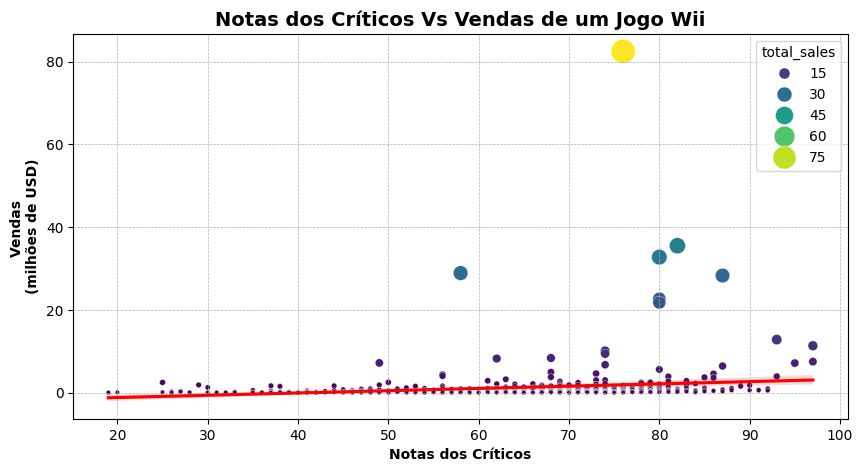

In [363]:
# Filtrando somente os jogos em que temos as notas dos críticos
df_games_wii_critics = df_games_wii[~df_games_wii['critic_score'].isna()]

# Plotando um gráfico de dispersão com o DF filtrado com notas dos críticos para jogos da plataforma Wii
plt.figure(figsize=(10, 5))
scatter = sns.scatterplot(data=df_games_wii_critics, 
                          x='critic_score', 
                          y='total_sales', 
                          hue='total_sales', 
                          palette='viridis', 
                          size='total_sales', 
                          sizes=(10, 300)
                          )

# Adicionando uma linha de tendência
sns.regplot(data=df_games_wii_critics, 
            x='critic_score', 
            y='total_sales', 
            scatter=False, 
            color='red')

# Título e rótulos
plt.title('Notas dos Críticos Vs Vendas de um Jogo Wii', fontsize=14, weight='bold')
plt.xlabel('Notas dos Críticos', fontsize=10, weight='bold')
plt.ylabel('Vendas \n(milhões de USD)', fontsize=10, weight='bold')

# Melhorando a exibição do gráfico
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [364]:
# Calculando a correlação entre revisões dos críticos e vendas dos jogos da plataforma Wii
critics_sales_corr_wii = df_games_wii_critics['critic_score'].corr(df_games_wii_critics['total_sales'])
print(f" A correlação entre revisões de críticos e vendas é: {critics_sales_corr_wii}")

 A correlação entre revisões de críticos e vendas é: 0.17755988806089953


##### E agora vamos focar nas notas dadas pelos usuários #####

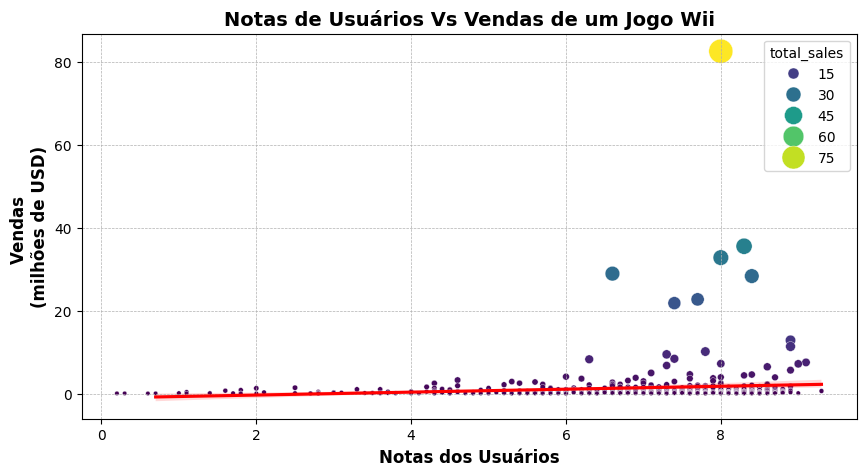

In [365]:
# Filtrando somente os jogos em que temos as notas dos usuários
df_games_wii_users = df_games_wii[~df_games_wii['user_score'].isna()]


# Plotando um gráfico de dispersão com o DF filtrado com notas dos críticos para jogos da plataforma Wii
plt.figure(figsize=(10, 5))
scatter = sns.scatterplot(data=df_games_wii_users, 
                          x='user_score', 
                          y='total_sales', 
                          hue='total_sales', 
                          palette='viridis', 
                          size='total_sales', 
                          sizes=(10, 300)
                          )

# Adicionando uma linha de tendência
sns.regplot(data=df_games_wii_critics, 
            x='user_score', 
            y='total_sales', 
            scatter=False, 
            color='red')

# Título e rótulos
plt.title('Notas de Usuários Vs Vendas de um Jogo Wii', fontsize=14, weight='bold')
plt.xlabel('Notas dos Usuários', fontsize=12, weight='bold')
plt.ylabel('Vendas \n(milhões de USD)', fontsize=12, weight='bold')

# Melhorando a exibição do gráfico
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [366]:
# Calculando a correlação entre revisões dos usuários e as vendas dos jogos da plataforma Wii
users_sales_corr_wii = df_games_wii_users['user_score'].corr(df_games_wii_critics['total_sales'])
print(f" A correlação entre revisões de usuários e vendas é: {users_sales_corr_wii}")

 A correlação entre revisões de usuários e vendas é: 0.11015051136372718


**Analisando os dados obtidos da plataforma Wii, podemos inferir que:**

A coorelação de vendas com as notas de avaliações de críticos e usuários é desprezível, pois esteve abaixo de 0.3 em ambos os casos.

**Agora compararemos as vendas dos mesmos jogos analisados para o Wii em outras plataformas**

In [367]:
# Criando uma lista com todos os nomes de jogos do Wii
games_wii_names_list = df_games_wii.reset_index()
games_wii_names_list = games_wii_names_list['name'].tolist()

print(games_wii_names_list[1:5])

['mario kart wii', 'wii sports resort', 'wii play', 'new super mario bros. wii']


In [368]:
# Filtrando somente jogos de outras plataformas, excluindo Wii
df_games_other_platforms = df_games[df_games['platform'] != 'wii'][['name', 'critic_score', 'user_score', 'total_sales']]
print(df_games_other_platforms.sample(5))

                           name  critic_score  user_score  total_sales
7037            carnival island          66.0         5.2         0.23
1894       imagine: babysitters           NaN         NaN         1.08
16618     xblaze: lost memories           NaN         7.0         0.01
8947   super monkey ball deluxe          81.0         8.2         0.15
7629          treasure hunter g           NaN         NaN         0.20


In [369]:
# Verificando quais jogos analisados da plataforma Wii também foram vendidos em outras plataformas
df_same_games = df_games_other_platforms[df_games_other_platforms['name'].isin(games_wii_names_list)]

print(df_same_games.sample(5))

                                     name  critic_score  user_score  \
198    mario & sonic at the olympic games           NaN         NaN   
8607                angry birds star wars          53.0         6.9   
10697                      nicktoons: mlb           NaN         NaN   
5928                         spider-man 3          52.0         7.4   
10532            america's next top model           NaN         NaN   

       total_sales  
198           5.09  
8607          0.17  
10697         0.10  
5928          0.29  
10532         0.11  


##### Novamente vamos iniciar com a analise das avaliações dos críticos ####

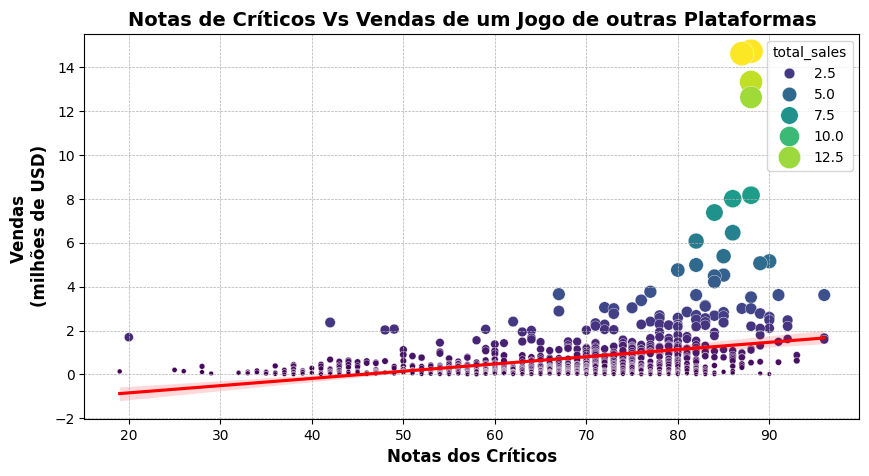

In [370]:
# Filtrando somente os jogos em que temos as notas dos críticos
df_same_games_critics = df_same_games[~df_same_games['critic_score'].isna()]

# Plotando um gráfico de dispersão com o DF filtrado com notas dos críticos para jogos de outras plataformas
plt.figure(figsize=(10, 5))
scatter = sns.scatterplot(data=df_same_games_critics, 
                          x= 'critic_score',
                          y= 'total_sales', 
                          hue='total_sales', 
                          palette='viridis', 
                          size='total_sales', 
                          sizes=(10, 300))

# Adicionando uma linha de tendência
sns.regplot(data=df_same_games_critics, 
            x='critic_score',
            y='total_sales',
            scatter=False,
            color='red')

# Título e rótulos
plt.title('Notas de Críticos Vs Vendas de um Jogo de outras Plataformas', fontsize=14, weight='bold')
plt.xlabel('Notas dos Críticos', fontsize=12, weight='bold')
plt.ylabel('Vendas \n(milhões de USD)', fontsize=12, weight='bold')

# Melhorando a exibição do gráfico
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [371]:
# Calculando a correlação entre revisões dos críticos e as vendas dos mesmos jogos em outras plataformas
critics_sales_corr_others = df_same_games_critics['critic_score'].corr(df_same_games_critics['total_sales'])
print(f" A correlação entre as revisões de críticos e as vendas dos mesmos jogos em outras plataformas é: {critics_sales_corr_others}")

 A correlação entre as revisões de críticos e as vendas dos mesmos jogos em outras plataformas é: 0.3604797140284848


##### Agora faremos o mesmo novamente considerando as notas dos usuários #####

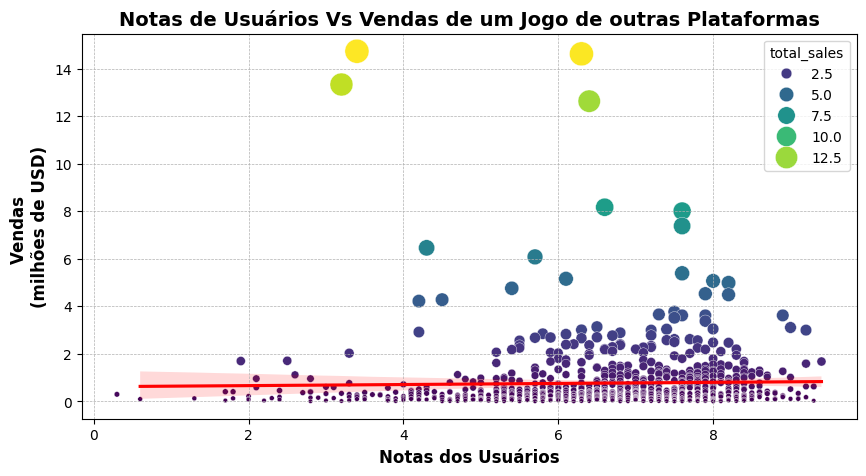

In [372]:
# Filtrando somente os jogos em que temos as notas dos usuários
df_same_games_users = df_same_games[~df_same_games['user_score'].isna()]


# Plotando um gráfico de dispersão com o DF filtrado com notas dos usuários para jogos de outras plataformas
plt.figure(figsize=(10, 5))
scatter = sns.scatterplot(data=df_same_games_users, 
                          x= 'user_score',
                          y= 'total_sales', 
                          hue='total_sales', 
                          palette='viridis', 
                          size='total_sales', 
                          sizes=(10, 300))

# Adicionando uma linha de tendência
sns.regplot(data=df_same_games_critics, 
            x= 'user_score',
            y= 'total_sales',
            scatter=False,
            color='red')

# Título e rótulos
plt.title('Notas de Usuários Vs Vendas de um Jogo de outras Plataformas', fontsize=14, weight='bold')
plt.xlabel('Notas dos Usuários', fontsize=12, weight='bold')
plt.ylabel('Vendas \n(milhões de USD)', fontsize=12, weight='bold')

# Melhorando a exibição do gráfico
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [373]:
# Calculando a correlação entre revisões dos usuários e as vendas dos mesmos jogos em outras plataformas
users_sales_corr_others = df_same_games_users['user_score'].corr(df_same_games_users['total_sales'])
print(f"A correlação entre as revisões de usuários e as vendas dos mesmos jogos em outras plataformas é: {users_sales_corr_others}")

A correlação entre as revisões de usuários e as vendas dos mesmos jogos em outras plataformas é: 0.0370437028127374


**Em comparação com a análise que fizemos com jogos na plataforma 'Wii', encontramos um resultado diferente para a correlação entre avaliações de usuários e críticos com vendas dos mesmos jogos em outras plataformas:**

* A correlação encontrada entre vendas e notas dos críticos foi de 0.36, o que nos mostra que temos uma correlação fraca, mas ainda assim diferente do resultado obtido com a análise da plataforma wii, que nos mostrou uma correlação desprezível, de apenas 0.18;


* A correlação encontrada entre vendas e notas dos usuários foi de 0.037, o que nos mostra que neste caso nem temos correlação, pois podemos observar no gráfico que os jogos mais vendidos receberam apenas uma nota em torno de 3.5 pelos usuários. Este resultado também foi diferente do resultado obtido com a análise da plataforma wii, que nos mostrou uma correlação de 0.11;


* Em resumo, a avaliação dos críticos tende a ser mais importante para as vendas dos games do que a avaliação dos usuários, mas mesmo para as notas dos críticos esta correlação está longe de ser forte.

#### Agora daremos uma olhada na distribuição geral de jogos por gênero: ####

##### Quais são os gêneros mais lucrativos? #####

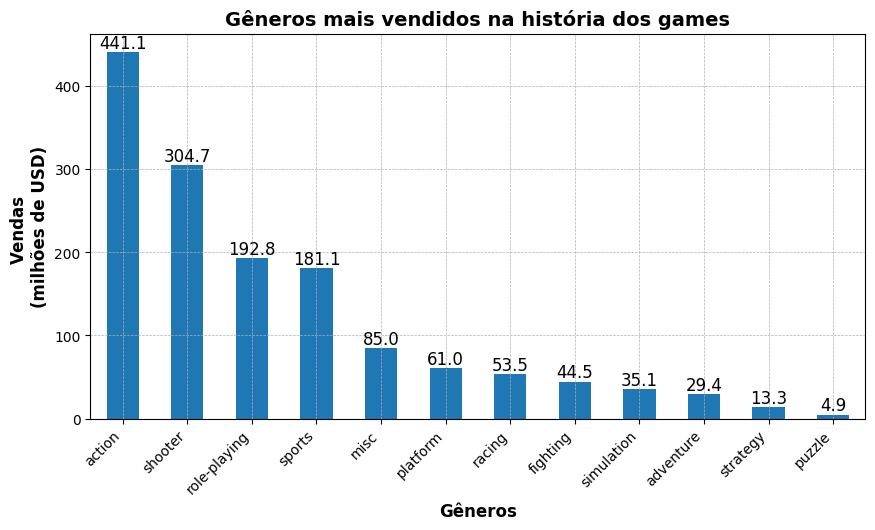

In [374]:
# Agrupando os dados do DF principal por gêneros e retornando a soma das vendas totais em ordem crescente
lucrative_genres = df_games_recently.groupby('genre', observed=False)['total_sales'].sum().sort_values(ascending=False)

# plotando um gráfico de barras para exibir os gêneros mais rentáveis 
lucrative_genres.plot(kind= 'bar',
                      figsize=[10, 5])
                      

# Adicionando rótulos de valor em cada barra
for index, value in enumerate(lucrative_genres.values):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom', fontsize=12, color='black')

# Melhorando a exibição do gráfico
plt.title('Gêneros mais vendidos na história dos games', fontsize=14, weight='bold')
plt.xlabel('Gêneros', fontsize=12, weight='bold')
plt.ylabel('Vendas \n(milhões de USD)', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

**Analisando os dados em geral, podemos observar que:**

* Os gêneros **mais lucrativos** são: **Action e Shooter**


* Os gêneros **menos lucrativos** são: **Strategy e Puzzle**

##### Podemos generalizar sobre gêneros com vendas altas e baixas? #####

In [375]:
# Filtrando o DF para obter somente as colunas desejadas e ordenados do maior para o menor pela coluna de vendas totais
top_100_games = df_games_recently[['name', 'genre', 'total_sales']].sort_values(by = 'total_sales', ascending = False)

# Obtendo os nomes e gêneros dos 100 games mais vendidos da história
top_100_games = top_100_games[['name', 'genre']][0:100]

# Agrupando os jogos por gênero e contando quantos jogos de cada gênero estão dentre os 1000 mais vendidos
top_100_games_genre = top_100_games.groupby('genre', observed=False)['genre'].count().sort_values(ascending = False)

print('Os gêneros que mais tem jogos no top 100, são:')
print()
print(top_100_games_genre.head(2))

Os gêneros que mais tem jogos no top 100, são:

genre
shooter    34
action     23
Name: genre, dtype: int64


In [376]:
# Filtrando o DF para obter somente as colunas desejadas e ordenados do menor para o maior pela coluna de vendas totais
bottom_100_games = df_games[['name', 'genre', 'total_sales']].sort_values(by = 'total_sales', ascending = True)

# Obtendo os nomes e gêneros dos 100 games menos vendidos da história
bottom_100_games = bottom_100_games[['name', 'genre']][0:100]

# Agrupando os jogos por gênero e contando quantos jogos de cada gênero estão dentre os 100 menos vendidos
bottom_100_games_genre = bottom_100_games.groupby('genre', observed=False)['genre'].count().sort_values(ascending = False)

print('Os gêneros que mais tem jogos dentre os 100 piores, são:')
print()
print(bottom_100_games_genre.head(2))

Os gêneros que mais tem jogos dentre os 100 piores, são:

genre
adventure    22
action       15
Name: genre, dtype: int64


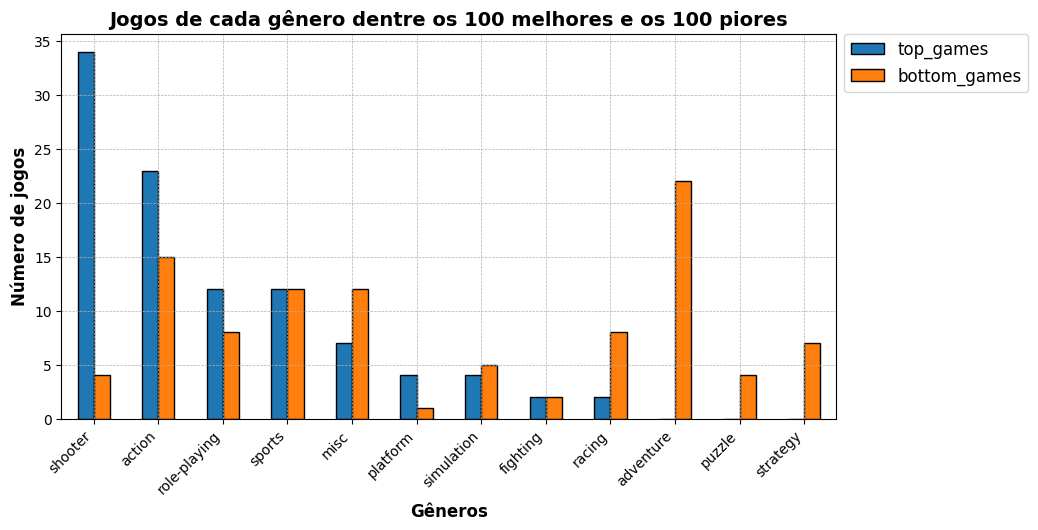

In [377]:
top_bottom_concat = pd.concat([top_100_games_genre, bottom_100_games_genre], axis = 'columns')
top_bottom_concat.columns = ['top', 'bottom']

# plotando o gráfico
top_bottom_concat.plot(kind= 'bar',
                      figsize= [10, 5],
                      edgecolor='black')

# Melhorando a exibição do gráfico
plt.title('Jogos de cada gênero dentre os 100 melhores e os 100 piores', fontsize=14, weight='bold')
plt.xlabel('Gêneros', fontsize=12, weight='bold')
plt.ylabel('Número de jogos', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(['top_games', 'bottom_games'], fontsize=12, bbox_to_anchor=(1.01, 1), loc="upper left", borderaxespad=0)

plt.show()

**Analisando o gráfico acima podemos inferir que:**

* Não podemos generalizar sobre gêneros com vendas altas e baixas, pois alguns gêneros tem um número parelho de jogos amados e jogos odiados, como por exemplo **fighting, action, misc, role-playing, simulation e sports;**


* O gênero **action**, por exemplo, aparece como segundo colocado dentre os 100 melhores games, mas também aparece como o segundo que mais tem jogos ruins;


* Porém, é possível verificar um gênero que se destaca de forma positiva. O gênero **shooter** tem muito mais probabilidade de estar do lado positivo da balança;


* E também que alguns dos gêneros tem muito mais chance de estarem do lado negro da força, como por exemplo: **adventure, strategy e puzzle.**

### Nesta etapa criaremos um perfil de usuário para cada região (AN, UE, JP): ###

* Iremos avaliar as cinco plataformas principais para cada região e a fatia que ocupam no mercado;
* Verificaremos quais os cinco principais gêneros de cada uma das regiões e;
* Se as classificações do ESRB afetam as vendas em regiões individuais.

#### Quais são as cinco plataformas principais para cada região? ####

##### Primeiro vamos ter um apanhado do mercado mundial nos últimos anos #####

In [378]:
# Verificando quais são as 5 maiores plataformas da atualidade considerando o mundo todo
top_platforms_world = df_games_recently.groupby('platform', observed=False)['total_sales'].sum().sort_values(ascending=False).reset_index()

# Criando uma lista com as 5 maiores plataformas mundiais para analisarmos posteriormente o desempenho delas em cada região
top_5_platform_list = top_platforms_world['platform'].tolist()[0:5]

print(f"As 5 maiores plataformas do mundo são: {top_5_platform_list}")

As 5 maiores plataformas do mundo são: ['ps4', 'ps3', 'x360', '3ds', 'xone']


##### Agora vamos olhar para cada região #####

In [379]:
# Agrupando o DF de games por plataforma e retornando a soma das colunas das vendas em cada região
df_platform_per_region = df_games_recently.groupby('platform', observed=False)[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum()
df_platform_per_region = df_platform_per_region[df_platform_per_region['total_sales'] > 0]
df_platform_per_region = df_platform_per_region.reset_index()

print(df_platform_per_region)

   platform  na_sales  eu_sales  jp_sales  total_sales
0       3ds     55.31     42.64     87.79       194.61
1        ds      4.59      3.53      3.72        12.55
2        pc     19.12     37.76      0.00        62.65
3       ps3    103.38    106.86     35.29       288.79
4       ps4    108.74    141.09     15.96       314.14
5       psp      0.13      0.42     10.47        11.19
6       psv     10.98     11.36     21.04        49.18
7       wii     17.45     11.92      3.39        35.37
8      wiiu     38.10     25.13     13.01        82.19
9      x360    140.05     74.52      1.57       236.54
10     xone     93.12     51.59      0.34       159.32


In [380]:
# Criando uma função para imprimir as 5 maiores plataformas de cada região somente para comparação

def top_5_platforms (sales):
    top_list = df_platform_per_region.sort_values(by= sales, ascending = False) #filtrando a região e ordenando do maior para o menor
    top_list = top_list['platform'].tolist() # transformando as 5 maiores plataformas em uma lista
   
    return print(f"As 5 maiores plataformas da região {sales.split('_')[0]} são: {top_list[0:5]}")
    
top_5_platforms('na_sales')
top_5_platforms('eu_sales')
top_5_platforms('jp_sales')

As 5 maiores plataformas da região na são: ['x360', 'ps4', 'ps3', 'xone', '3ds']
As 5 maiores plataformas da região eu são: ['ps4', 'ps3', 'x360', 'xone', '3ds']
As 5 maiores plataformas da região jp são: ['3ds', 'ps3', 'psv', 'ps4', 'wiiu']


**Agora vamos avaliar a fatia que cada plataforma top-5 ocupa no mercado da região nos últimos 5 anos**

In [381]:
# Criando uma coluna para o total de vendas de cada região para realização do cálculo
df_platform_per_region['na_total'] = df_platform_per_region['na_sales'].sum()
df_platform_per_region['eu_total'] = df_platform_per_region['eu_sales'].sum()
df_platform_per_region['jp_total'] = df_platform_per_region['jp_sales'].sum()

# Filtrando o DataFrame para manter somente as 5 maiores plataformas
df_top_5_platform = df_platform_per_region[df_platform_per_region['platform'].isin(top_5_platform_list)]
df_top_5_platform = df_top_5_platform.set_index('platform')

# Imprimindo na ordem da operação para facilitar a visualização
print(df_top_5_platform[['na_sales', 'na_total', 'eu_sales', 'eu_total', 'jp_sales', 'jp_total']])

          na_sales  na_total  eu_sales  eu_total  jp_sales  jp_total
platform                                                            
3ds          55.31    590.97     42.64    506.82     87.79    192.58
ps3         103.38    590.97    106.86    506.82     35.29    192.58
ps4         108.74    590.97    141.09    506.82     15.96    192.58
x360        140.05    590.97     74.52    506.82      1.57    192.58
xone         93.12    590.97     51.59    506.82      0.34    192.58


In [382]:
# Criando as colunas com os resultados da operação para cálculo da fatia no mercado
df_top_5_platform['na_slices'] = df_top_5_platform['na_sales'] / df_top_5_platform['na_total'] * 100
df_top_5_platform['eu_slices'] = df_top_5_platform['eu_sales'] / df_top_5_platform['eu_total'] * 100
df_top_5_platform['jp_slices'] = df_top_5_platform['jp_sales'] / df_top_5_platform['jp_total'] * 100

df_slices_per_region = df_top_5_platform[['na_slices', 'eu_slices', 'jp_slices']]

print('Abaixo os valores ocupados no mercado de cada região pelas plataformas TOP-5:')
print()
print(df_slices_per_region)

Abaixo os valores ocupados no mercado de cada região pelas plataformas TOP-5:

          na_slices  eu_slices  jp_slices
platform                                 
3ds        9.359189   8.413243  45.586250
ps3       17.493274  21.084409  18.324852
ps4       18.400257  27.838286   8.287465
x360      23.698326  14.703445   0.815246
xone      15.757145  10.179156   0.176550


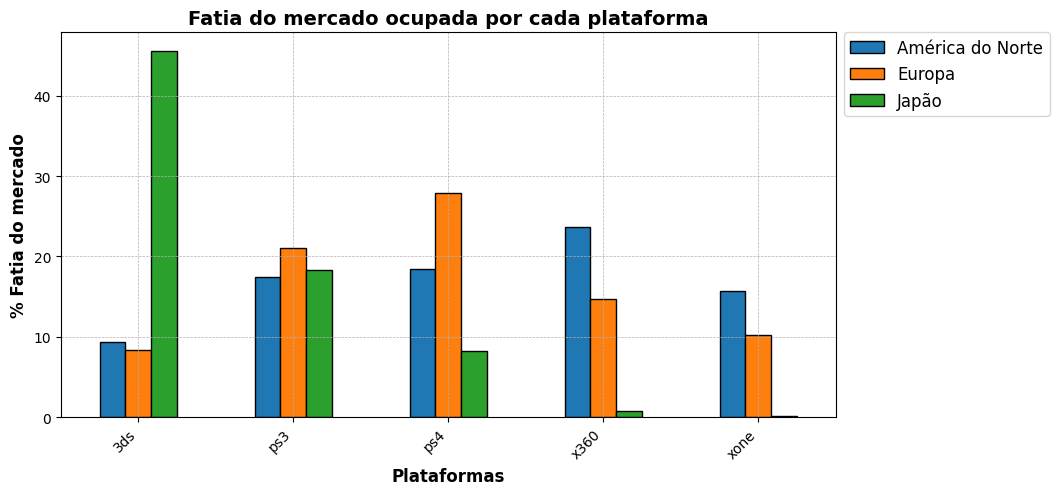

In [383]:
# Plotando um gráfico de barras para facilitar a visualização dos dados
df_slices_per_region.plot(kind= 'bar',
                          figsize= [10, 5],
                          edgecolor='black')                      


# Melhorando a exibição do gráfico
plt.title('Fatia do mercado ocupada por cada plataforma', fontsize=14, weight='bold')
plt.xlabel('Plataformas', fontsize=12, weight='bold')
plt.ylabel('% Fatia do mercado', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(['América do Norte', 'Europa', 'Japão'], fontsize=12, bbox_to_anchor=(1.01, 1), loc="upper left", borderaxespad=0)

plt.show()

**Analisando o mercado das plataformas por região, podemos observar que temos algumas diferenças importantes entre as regiões, mas também que temos muita coisa em comum:**

* **O mercado americano e o europeu são muito semelhantes**. Ambos tem as mesmas 5 plataformas como top-5, somente com uma ordem um pouco diferente, pois a plataforma **X360** lidera o mercado americano e ocupa a terceira posição na europa;  


* A maior diferença observada é quando comparamos o mercado do Japão, pois as 5 plataformas que lideram o mercado japonês sequer são as mesmas que lideram os outros mercados avaliados. No top-5 japonês temos 2 plataformas que não aparecem dentre as 5 primeiras dos outros mercados: **PSV e WiiU** e, além disso, a plataforma que lidera o mercado japonês é **3DS**, ocupando uma fatia de mais de **45% do mercado**, sendo que esta plataforma é **apenas 5ª colocada nos outros mercados avaliados, mordendo uma fatia menor do que 10%**;  


* Outra diferença importante olhando para o mercado japonês é que **a plataforma X360, a mais forte das Américas e a terceira da Europa, não aparece no top-5 japonês e ocupa uma fatia irrelevante do mercado (0.8%)**. O mesmo acontece com **a plataforma Xone, que é a 4ª colocada na América e na Europa**, ocupando 15% e 10% do mercado respectivamente, mas **no japão praticamente não existe, e ocupa uma fatia de míseros 0.18%.**  


* A única plataforma que ocupa uma fatia parecida nos 3 mercados é a **PS3**, que ocupa **17.5%, 21.1% e 18.3%** nos mercados americano, europeu e japonês, respectivamente.

#### Quais são os cinco gêneros principais para cada região? ####

In [384]:
# Agrupando o DF de games por gênero e retornando a soma das colunas das vendas em cada região
df_genre_per_region = df_games_recently.groupby('genre', observed=False)[['na_sales', 'eu_sales', 'jp_sales']].sum()

print(df_genre_per_region)

              na_sales  eu_sales  jp_sales
genre                                     
action          177.84    159.34     52.80
adventure         8.92      9.46      8.24
fighting         19.79     10.79      9.44
misc             38.19     26.32     12.86
platform         25.38     21.41      8.63
puzzle            1.13      1.40      2.14
racing           17.22     27.29      2.50
role-playing     64.00     48.53     65.44
shooter         144.77    113.47      9.23
simulation        7.97     14.55     10.41
sports           81.53     69.09      8.01
strategy          4.23      5.17      2.88


In [385]:
# Criando uma função para imprimir os 5 maiores gêneros de cada região

def top_5_genres (sales):
    top_list = df_genre_per_region[sales].sort_values(ascending = False).reset_index() #filtrando a região e ordenando do maior para o menor
    top_list = top_list['genre'][0:5].tolist() # transformando os 5 maiores gêneros em uma lista
    return print(f"Os 5 maiores gêneros da região {sales.split('_')[0]} são: {top_list}")

top_5_genres('na_sales')
top_5_genres('eu_sales')
top_5_genres('jp_sales')

Os 5 maiores gêneros da região na são: ['action', 'shooter', 'sports', 'role-playing', 'misc']
Os 5 maiores gêneros da região eu são: ['action', 'shooter', 'sports', 'role-playing', 'racing']
Os 5 maiores gêneros da região jp são: ['role-playing', 'action', 'misc', 'simulation', 'fighting']


* Os gêneros preferidos da América do Norte e Europa são os mesmos nas 4 primeiras posições, mais uma vez mostrando grande similaridade entre estes mercados;


* Mais uma vez podemos observar uma grande diferença do mercado japonês para os mercados europeu e norte americano, pois os gêneros **simulation e fighting** estão na preferência do país a frente de outros gêneros como Shooter e Sports, que são 2º e 3º colocados nos outros mercados citados.

#### As classificações do ESRB afetam as vendas em regiões individuais? ####

In [386]:
# Criando um DF somente com as colunas de interesse e para quando rating é conhecido
df_rating = df_games_recently[df_games_recently['rating'] != 'unknown'][['rating', 'na_sales', 'eu_sales', 'jp_sales']].reset_index(drop=True)

df_rating_groupby = df_rating.groupby('rating', observed=False)[['na_sales', 'eu_sales', 'jp_sales']].sum()

print(df_rating_groupby)

         na_sales  eu_sales  jp_sales
rating                               
AO           0.00      0.00      0.00
E          114.37    113.03     28.33
E10+        75.70     55.37      8.19
EC           0.00      0.00      0.00
K-A          0.00      0.00      0.00
M          231.57    193.96     21.20
RP           0.00      0.00      0.00
T           66.02     52.96     26.02
unknown      0.00      0.00      0.00


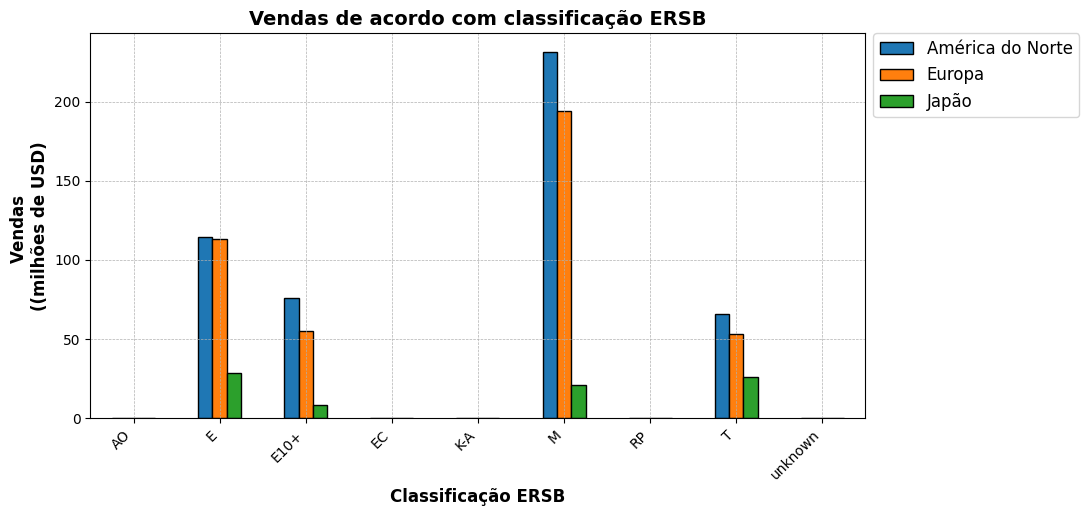

In [387]:
# plotando o gráfico
df_rating_groupby.plot(kind= 'bar',
                       figsize= [10, 5],
                       edgecolor='black')

# Melhorando a exibição do gráfico
plt.title('Vendas de acordo com classificação ERSB', fontsize=14, weight='bold')
plt.xlabel('Classificação ERSB', fontsize=12, weight='bold')
plt.ylabel('Vendas \n((milhões de USD)', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(['América do Norte', 'Europa', 'Japão'], fontsize=12, bbox_to_anchor=(1.01, 1), loc="upper left", borderaxespad=0)

plt.show()

**Novamente é possível observar a similaridade entre os mercados americano e europeu e a diferença destes para o mercado japonês:**


* **Para os mercados americano e europeu** a classificação ESRB influencia diretamente nas vendas dos jogos, sendo que jogos de classificação Mature (M) são disparadamente os mais vendidos, seguidos por jogos de classificação livre (E) e depois por jogos para maiores de 10 anos (E10+) e Teen (T).


* **Para o mercado japonês**, a classificação ESRB não interfere de forma similar às outras regiões analisadas. É possível observar que o comportamento do mercado japonês é muito parecido para jogos de classificação livre (E), Teen (T) e Mature (M), sendo que o mercado de jogos (M) é apenas o terceiro colocado, enquanto nas outras regiões lidera com folga.


* Os jogos para adultos (AO), os com classificação pendente (RP), os para crianças pequenas (EC) e (K-A) apareceram com vendas zeradas em todas as regiões.

### Nesta etapa testaremos as seguintes hipóteses: ###

* As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas;

* As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

#### Testanto a hipótese de que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas: ####

In [388]:
# Filtrando dados quando a plataforma é xone e as notas de usuário são conhecidas (foco são jogos com notas)
xone_user_score = (df_games_recently[(df_games_recently['platform'] == 'xone') & (~df_games_recently['user_score'].isna())])
xone_user_score_data = xone_user_score['user_score'].tolist()

# Filtrando dados quando a plataforma é pc e e as notas de usuário são conhecidas (foco são jogos com notas)
pc_user_score = (df_games_recently[(df_games_recently['platform'] == 'pc') & (~df_games_recently['user_score'].isna())])
pc_user_score_data = pc_user_score['user_score'].tolist()

print(xone_user_score_data)
print()
print(pc_user_score_data)

[7.9, 5.4, 6.4, 6.2, 4.1, 5.5, 7.5, 4.4, 7.2, 6.4, 4.3, 5.5, 3.1, 6.1, 6.2, 8.2, 7.4, 5.9, 5.4, 6.9, 6.6, 7.9, 6.3, 7.5, 6.8, 5.8, 6.4, 6.6, 8.2, 6.1, 7.3, 8.0, 8.0, 6.2, 6.9, 9.2, 6.1, 7.8, 8.4, 5.9, 5.1, 5.2, 5.8, 7.7, 7.4, 5.6, 6.8, 6.2, 6.9, 5.7, 7.0, 6.4, 5.9, 7.7, 7.3, 7.4, 5.8, 7.8, 7.3, 6.7, 5.9, 5.1, 4.6, 5.1, 5.7, 8.0, 5.7, 6.8, 5.1, 7.5, 6.9, 7.8, 8.1, 6.0, 6.4, 6.3, 7.0, 7.8, 7.1, 6.0, 6.9, 3.2, 8.6, 7.7, 5.1, 6.6, 7.9, 6.1, 7.2, 5.5, 8.5, 7.0, 5.4, 4.3, 6.8, 5.5, 5.8, 5.3, 7.1, 5.5, 4.0, 6.2, 8.3, 6.8, 6.7, 6.8, 3.1, 7.3, 3.0, 7.0, 8.3, 7.0, 7.2, 4.4, 7.0, 6.9, 8.3, 7.5, 8.0, 7.2, 6.6, 7.3, 4.1, 7.9, 8.7, 5.7, 8.0, 2.1, 8.2, 5.6, 7.2, 6.2, 5.3, 7.5, 6.0, 3.1, 7.6, 8.5, 6.8, 6.3, 5.8, 7.7, 6.9, 8.4, 5.2, 4.9, 7.1, 7.1, 6.1, 8.1, 6.3, 6.0, 8.9, 7.7, 1.6, 8.0, 5.4, 8.1, 4.3, 7.4, 4.3, 7.1, 5.8, 4.2, 6.6, 7.3, 7.2, 7.1, 6.7, 8.8, 7.9, 8.1, 3.1, 7.5, 6.3, 8.2, 7.1, 6.8, 6.0, 8.2, 6.6, 6.7]

[4.0, 3.9, 7.9, 4.8, 7.9, 4.2, 2.2, 6.0, 5.4, 7.9, 6.7, 5.5, 8.2, 7.5, 6.2, 8.2, 5.7, 5.

**EXPLICAÇÃO:**

Como iremos comparar se as médias de duas populações são iguais entre si, utilizaremos o **teste-t** e faremos a formulação de uma **hipótese bicaudal**. 
O objetivo de um teste de uma hipótese bicaudal é mostrar se a média amostral é significativamente maior ou menor do que a média de uma população.

**Iremos definir o valor do Limiar Alpha em 5%**, ou seja, **0.05**. Isso significa que iremos verificar se um valor cai na área de 2,5% à esquerda da média ou 2,5% à direita da média e, se isso acontecer, podemos concluir que o nosso resultado experimental cumpre o requisito de significância estatística. Portanto, **rejeitamos a hipótese nula**.


Na estatística, **A hipótese nula H0**, costuma representar a ideia de que não há diferença entre as médias (ou seja, elas são iguais). Já **A hipótese alternativa H1**, representa a ideia de que há diferença entre as médias (ou seja, elas são diferentes entre si).

É sensato usar o **p-valor** para decidir aceitar ou rejeitar a hipótese nula. **O valor-p** é a probabilidade de obter um resultado pelo menos tão extremo quanto o que estamos considerando, supondo que a hipótese nula esteja correta. Se o **valor-p** for menor que **alpha**, rejeitamos a hipótese nula. Caso contrário, não podemos rejeitá-la.

**Porém, o teste-t nos exige um parâmetro "equal_var", para o qual devemos seguir da seguinte forma:**

* Se as variâncias forem iguais, usaremos equal_var=True;
* Se as variâncias forem diferentes, usaremos equal_var=False

**Portanto, antes de seguirmos para o test-t, devemos primeiro verificar a igualdade das variâncias através do teste de Levene. Caso o p-valor para o teste de Levene seja menor do que o alpha, rejeitamos a hipótese nula.**

In [389]:
#TESTE DE LEVENE

# Hipótese Nula (h0) = Não há uma diferença significativa entre as variâncias.
# Hipótese Alternativa (h1) = Há uma diferença significativa entre as variâncias.

alpha = 0.05

levene_test = st.levene(xone_user_score_data, pc_user_score_data)

print(levene_test)

LeveneResult(statistic=6.295287176069245, pvalue=0.012514842818505541)


**Como o p-valor do teste de Levene é menor do que o nível de significância (alpha), rejeitamos a hipótese nula. Portanto, vamos considerar que as variâncias das amostras são estatisticamente diferentes e devemos utilizar "equal_var = False".**

In [390]:
#TESTE T

# Hipótese nula (h0): As classificações médias dos usuários das plataformas Xbox One e PC são iguais;
# Hipótese Alternativa (h1): As classificações médias dos usuários das plataformas Xbox One e PC não são iguais.

#definindo nível de significância
alpha = 0.05

# Realizando o ttest para cálculo do p-valor e chamando os dados obtidos anteriormente
results = st.ttest_ind(xone_user_score_data, pc_user_score_data, equal_var = False)

print('valor-p', results.pvalue)
print()

if results.pvalue < alpha:
    print('Como p-valor é menor que alpha, rejeitamos a hipótese nula.')
else:
     print('Como p-valor é maior que alpha, Não podemos rejeitar a hipótese nula')

valor-p 0.5489537965134912

Como p-valor é maior que alpha, Não podemos rejeitar a hipótese nula


**Como o valor-p obtido é maior que o valor de alpha, não podemos rejeitar a hipótese nula.
Isso significa que estatísticamente não há diferença entre as médias de notas dadas pelos usuários das plataformas Xbox One e PC.**

#### Testando a hipótese de que classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes: ####

**Como iremos novamente comparar duas médias, faremos novamente a formulação de uma hipótese bicaudal. Portanto filtraremos os dados necessários e seguiremos da mesma forma dos testes realizados anteriormente, iniciando com teste Levene para verificação da igualdade das variâncias e posteriormente com o teste-t.**

In [391]:
# Filtrando dados quando o gênero é "Action" e as notas de usuário são conhecidas (foco são jogos com notas)
action_user_score = (df_games_recently[(df_games_recently['genre'] == 'action') & (~df_games_recently['user_score'].isna())])
action_user_score_data = action_user_score['user_score'].tolist()

# Filtrando dados quando o gênero é "Sports" e as notas de usuário são conhecidas (foco são jogos com notas)
sports_user_score = (df_games_recently[(df_games_recently['genre'] == 'sports') & (~df_games_recently['user_score'].isna())])
sports_user_score_data = sports_user_score['user_score'].tolist()

print(action_user_score_data)
print()
print(sports_user_score_data)

[8.2, 8.1, 8.3, 6.6, 6.9, 9.1, 7.9, 6.7, 6.1, 8.1, 8.4, 6.3, 4.9, 7.6, 8.1, 4.1, 8.2, 6.8, 7.9, 8.9, 8.1, 7.8, 7.9, 7.0, 8.6, 9.0, 7.9, 7.7, 6.3, 7.5, 7.4, 7.6, 7.5, 7.9, 7.5, 6.5, 7.9, 5.1, 7.3, 5.1, 3.5, 7.1, 7.9, 4.5, 6.5, 7.2, 7.7, 4.2, 8.2, 6.8, 5.8, 7.9, 6.6, 4.8, 6.5, 7.9, 6.0, 7.1, 6.1, 8.1, 8.0, 7.2, 6.6, 6.1, 7.8, 7.5, 7.2, 8.7, 6.2, 8.0, 6.3, 5.0, 8.5, 8.3, 7.5, 6.5, 4.9, 7.9, 5.4, 7.8, 7.6, 5.5, 6.3, 6.8, 8.3, 7.7, 7.4, 8.4, 7.3, 7.7, 7.6, 6.4, 7.5, 5.9, 6.4, 7.3, 4.1, 7.7, 8.7, 7.1, 6.8, 6.2, 8.2, 7.0, 8.3, 7.0, 5.2, 7.2, 6.8, 4.1, 6.4, 8.5, 7.9, 6.9, 7.1, 7.4, 7.1, 7.6, 8.3, 8.8, 5.3, 8.0, 7.0, 6.3, 4.9, 8.2, 7.3, 5.2, 6.8, 7.2, 6.7, 8.0, 7.0, 7.1, 7.8, 7.1, 7.5, 1.6, 5.4, 8.0, 8.8, 7.3, 7.1, 7.2, 7.0, 7.1, 7.8, 6.7, 7.7, 7.7, 7.2, 7.7, 4.6, 7.2, 4.6, 7.4, 5.9, 8.5, 7.6, 6.6, 8.5, 5.9, 8.5, 6.8, 3.4, 7.7, 6.4, 3.0, 6.5, 6.9, 6.1, 8.1, 3.7, 5.5, 4.6, 5.6, 7.0, 7.8, 5.9, 6.2, 4.3, 7.6, 7.4, 7.6, 7.0, 6.9, 8.7, 7.5, 6.4, 7.0, 7.2, 4.7, 5.6, 8.3, 5.1, 4.1, 5.0, 7.4, 7.1, 8.4,

In [392]:
#TESTE DE LEVENE
# Caso o p-valor para o teste de Levene seja menor do que o alpha, rejeitamos a hipótese nula

# Hipótese Nula (h0) = Não há uma diferença significativa entre as variâncias.
# Hipótese Alternativa (h1) = Há uma diferença significativa entre as variâncias.

alpha = 0.05

levene_test = st.levene(action_user_score_data, sports_user_score_data)

print(levene_test)

LeveneResult(statistic=19.259864452764166, pvalue=1.3125789036876737e-05)


**Como o teste de Levene retornou um valor-p maior que o nível de significância (alpha), não podemos rejeitar a hipótese nula. portanto para o teste t consideraremos que as duas variâncias não são diferentes e utilizaremos "equal_var = True"**

In [393]:
#TESTE T

# Hipótese nula (h0): As classificações médias dos usuários dos gêneros Action e Sports são as mesmas;
# Hipótese Alternativa (h1): As classificações médias dos usuários dos gêneros Action e Sports não são as mesmas.

#definindo valor de alpha
alpha = 0.05

# Realizando o ttest para cálculo do p-valor e chamando os dados obtidos anteriormente
results = st.ttest_ind(action_user_score_data, sports_user_score_data, equal_var = True)

print('valor-p', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
     print('Não podemos rejeitar a hipótese nula')

valor-p 3.716308946093486e-26
Rejeitamos a hipótese nula


**Como o valor-p obtido é menor que o valor de alpha, rejeitamos a hipótese nula.
Isso significa que estatísticamente as médias de notas dadas pelos usuários são diferentes para jogos dos gêneros "Action" e "Sports".**

### Conclusão geral: ###

Começamos analisando o número de jogos lançados ao longo da história, do ano 1980 até 2016 e observamos que o mercado teve um grande 'boom' de lançamentos de jogos, iniciado no ano 2002 com a chegada do PS2 e que durou até o ano de 2011, quando teve uma queda e depois se estabilizou até 2016. Agora o mercado está estável em relação à quantidade de lançamentos de novos jogos por ano;

Analisando mais detalhadamente as plataformas, observamos que as que somaram mais vendas ao longo dos anos foram: ps2, x360, ps3, wii e ds. Porém, algumas delas sequer estão presentes no mercado atual.
Podemos perceber também que as plataformas seguem um padrão parecido em relação ao seu ciclo de vida, pois na média somem do mercado em cerca de 9 a 11 anos. Elas tem um crescimento cerca de 4 a 5 anos, seguido por um declínio de também 4 a 5 anos, vindo a ser retirado do mercado;

Por este motivo citado acima, decidimos focar nos dados dos últimos 5 anos, pois assim conseguiremos ver se alguma plataforma surgiu nos últimos 3 anos e tem tendência de crescimento ou se ela já passou pelo período habitual de crescimento e tende a cair ou mesmo sair do mercado no próximo ano;

Com estes dados de 2012 a 2016 analisados pudemos tirar algumas conclusões importantes. Nestes 5 anos, 11 plataformas estiveram presentes no mercado, mas para o ano de 2016, apenas 8 ainda estão presentes, sendo que para o próximo ano, a previsão é de que apenas 6 permaneçam no mercado (PS4, Xbox One, 3DS, PC, PSV e WiiU). Considerando que estamos em dezembro de 2016 e os dados deste ano estão completos, todas as plataformas já entraram na fase de declínio e as 3 últimas citadas já ocupando uma fatia muito pequena; 

Podemos observar também que a média de vendas dos jogos para as diferentes plataformas (considerando apenas as mais populares), é muito parecida. São poucos os jogos que se destacam muito no meio da multidão e faturam milhões de dólares. Para ser mais exato, de 2886 jogos analisados nos últimos 5 anos, apenas 40 jogos tiveram um faturamento acima de 5M USD, apenas 9 tiveram vendas acima de 10M USD e apenas 1 jogo conseguiu vendas acima de 20M USD, enquanto a média para jogos de plataformas estabelecidas fica em torno de 0.2M USD;

Analisando as vendas dos jogos da plataforma Wii, podemos concluir que a correlação das vendas com as notas de avaliações de críticos e usuários é desprezível, pois esteve abaixo de 0.3 em ambos os casos. E analisando o desempenho dos mesmos jogos do Wii em outras plataformas, vimos um pequeno aumento dessa correlação com as avaliações dos críticos, mas ainda assim, representando uma correlação fraca, ou seja, as análises e avaliações de críticos e usuários impacta muito pouco na venda dos games;

Em relação aos gêneros, podemos inferir que os de maior sucesso recente são: Action, Shooter, Role-Playing e Sports, enquanto que os jogos de Strategy e Puzzle não agradam a maioria e tem o menor desempenho. Porém, não podemos generalizar, pois analizando os 100 jogos mais amados e os 100 jogos mais odiados, podemos ver que existem gêneros que possuem um número equilibrado dentre os jogos mais amados e mais odiados. 

O único gênero que se destacou muito em relação a ter uma quantidade de jogos amados dentre o top-100, foi o gênero Shooter. Outros se mostraram parelhos e alguns se mostraram com resultados mais negativos, como adventure, strategy e puzzle. Um resultado interessante foi o do gênero Action, por exemplo, pois ele aparece como o segundo colocado dentre os 100 melhores games, mas também aparece como o segundo que mais tem jogos ruins;

Agora olhando mais detalhadamente para as diferentes regiões, podemos observar muita similaridade entre os mercados da América do Norte e da Europa. Porém, o mercado japonês apresenta muitas diferenças se comparado aos outros 2, como por exemplo:

As 5 plataformas que lideram o mercado japonês sequer são as mesmas que lideram os outros dois mercados avaliados. No top-5 japonês temos 2 plataformas que não aparecem dentre as 5 primeiras dos outros mercados: PSV e WiiU e, além disso, a plataforma que lidera o mercado japonês é 3DS, ocupando uma fatia de mais de 45% do mercado, sendo que esta plataforma é apenas 5ª colocada nos outros mercados avaliados, mordendo uma fatia menor do que 10%;

Outra diferença importante olhando para o mercado japonês é que a plataforma X360, a mais forte das Américas e a terceira da Europa nos últimos 5 anos, não aparece no top-5 japonês e ocupa uma fatia irrelevante do mercado (0.8%). O mesmo acontece com a plataforma Xbox One, que é a 4ª colocada na América e na Europa, ocupando 15% e 10% do mercado respectivamente, mas no japão praticamente não existe, e ocupa uma fatia de míseros 0.18%;

**E as diferenças do mercado japonês não param por aí:**

Os gêneros preferidos da América do Norte e Europa são os mesmos nas 4 primeiras posições do ranking (action, shooter, sports, role-playing), mais uma vez mostrando grande similaridade entre estes mercados. Mas o Japão tem um comportamento bem diferente, sendo que os primeiros do ranking do país são (role-playing, action, misc, simulation e fighting), muito diferente dos outros mercados;

Em relação as classificações ESRB, o mercado japonês mais uma vez apresentou diferenças, sendo que para os mercados americano e europeu a classificação ESRB influencia diretamente nas vendas dos jogos, sendo que jogos de classificação Mature (M) são disparadamente os mais vendidos, seguidos por jogos de classificação livre (E) e depois por jogos para maiores de 10 anos (E10+) e Teen (T);
Para o mercado japonês, a classificação ESRB não interfere de forma similar às outras regiões analisadas. É possível observar que o comportamento do mercado japonês é muito parecido para jogos de classificação livre (E), Teen (T) e Mature (M), sendo que o mercado de jogos Mature (M) é apenas o terceiro colocado, enquanto nas outras regiões lidera com folga absoluta.

**Por fim, testamos duas hipóteses:**


1ª Que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas. Neste caso não podemos rejeitar a hipótese nula, que nos dizia que não há diferença entre as médias de notas dadas pelos usuários das plataformas Xbox One e PC,  pois o p-valor obtido foi de 0.55 e o alpha estabelecido foi de 0.05;

2ª Que as classificações médias de usuários para os gêneros Action e Sports são diferentes. Neste caso rejeitamos a hipótese nula. Portanto, as médias de notas dadas pelos usuários são de fato diferentes para jogos dos gêneros "Action" e "Sports". O p-valor obtido nesta análise foi de 3.71e-26 e o alpha estabelecido também era de 0.05.


**EM RESUMO:**

* O mercado de games vem apresentando uma queda nos últimos anos;


* As plataformas costumam ter um ciclo de vida de 9 a 11 anos (4 a 5 anos de crescimento, 4 a 6 anos de declínio);


* Para o próximo ano, a tendência é de que tenhamos somente 6 plataformas no mercado (PS4, Xbox One, 3DS, PC, PSV e WiiU);


* A média de vendas dos jogos não é muito diferente quando comparamos somente as plataformas de renome;


* São raros os jogos que se destacam muito e vendem milhões de USD (40 jogos faturaram acima de 5M USD entre 2886 analisados);


* A correlação das vendas com as notas de avaliações de críticos e usuários é desprezível e impacta muito pouco nas vendas;


* Os gêneros de maior sucesso recente são: Action, Shooter, Role-Playing e Sports, enquanto que os jogos de Strategy e Puzzle não agradam a maioria e tem o menor desempenho;


* Porém, não podemos generalizar, pois alguns gêneros possuem um número equilibrado dentre os jogos mais amados e mais odiados;


* O único gênero que se destacou muito em relação a ter uma quantidade de jogos amados dentre o top-100, foi o gênero Shooter;


* Os gêneros que se mostraram com resultados mais negativos, foram adventure, strategy e puzzle;


* As plataformas e gêneros preferidos, assim como o impacto das classificações ESRB nos mercados da América e Europa são bastante semelhantes entre si, podendo muitas vezes ser realizada a mesma campanha. Porém, se diferem muito do mercado japonês, que deve ser tratado a parte.

<center> 

# Renan Rosental de Oliveira # 


